# Transformação de Intensidades

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from PIL import Image, ImageFilter

def my_readimage(path):
    file = open(path, 'r')

    read_header = file.readline()
    read_wh = file.readline()
    aux0 = read_wh.split()
    columns = int(aux0[0])
    rows = int(aux0[1])
    max_intensity = file.readline()


    aux = file.read().split()
    aux_matrix = np.reshape(aux,(rows, columns))
    intensity_matrix = np.zeros((rows, columns), float)

    for i in range(rows):
        for j in range(columns):
            intensity_matrix[i][j] = int(aux_matrix[i][j])
    return read_header, rows, columns, max_intensity, intensity_matrix

def my_writeimage(header, rows, columns, max_intensity, new_matrix, file_name):
    #print('Saving new file: \n')
    #file_name = input('Output filename:')+'.pgm'
    with open(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/'+file_name, 'w') as saida:
        saida.write(str(header))
        saida.write(str(columns) + ' ' + str(rows) + '\n')
        saida.write(str(max_intensity))
        np.savetxt(saida, new_matrix, delimiter=' ', newline='\n', header='', footer='', comments='# ', fmt='%i')
        
def my_negativeimage(*args):
    intensity_quantity = int(max_intensity)+1
    total_pixels = rows*columns
    new_matrix = np.array(matrix)
    eq_map = np.arange(0,intensity_quantity,1,int)
    for l in range(intensity_quantity):
        eq_map[l] = np.ceil(int(max_intensity)-l)
        new_matrix = np.where(matrix != l, new_matrix, eq_map[l])
    #for iz in range(intensity_quantity):
    #    new_matrix = np.where(matrix != iz, new_matrix, eq_map[iz])
    return new_matrix

def my_logfilter(header, rows, columns, max_intensity, matrix, c):
    new_matrix = np.array(matrix, dtype = np.uint8)
    eq_map = np.arange(0,256,1,float)
    #c = int(input('C constant value: '))
    for l in range(256):
        eq_map[l] = c * (np.log10(l + 1))
        new_matrix = np.where(matrix != l, new_matrix, eq_map[l])        
    return new_matrix
    
def my_gammafilter(header, rows, columns, max_intensity, matrix, c, gamma):
    new_matrix = np.array(matrix, dtype = np.uint8)
    eq_map = np.arange(0,256,1,float)
    #c = float(input('C constant value: '))
    #gamma = float(input('Gamma constant value: '))
    for l in range(256):
        eq_map[l] = c * (np.power(l, gamma))
        new_matrix = np.where(matrix != l, new_matrix, eq_map[l])        
    return new_matrix          
        

## Negativo de uma imagem:

Select an image: 

Selected input(.pgm):einstein


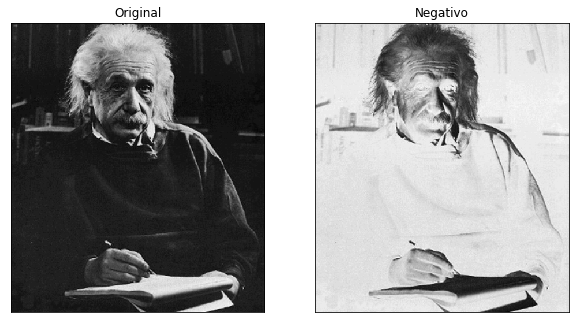

In [5]:
print('Select an image: \n')
header, rows, columns, max_intensity, matrix = my_readimage(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/'+input('Selected input(.pgm):')+'.pgm')

new_matrix = my_negativeimage(header, rows, columns, max_intensity, matrix)
my_writeimage(header, rows, columns, max_intensity, new_matrix, 'Lenaneg.pgm')

img1 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/einstein.pgm',0)
#img1 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/einstein.pgm',0)
img2 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/Lenaneg.pgm',0)

plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img1, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, cmap='gray'),plt.title('Negativo')
plt.xticks([]), plt.yticks([])
plt.show()

## Filtro logarítmico:

Select an image: 

Selected input(.pgm):Lena


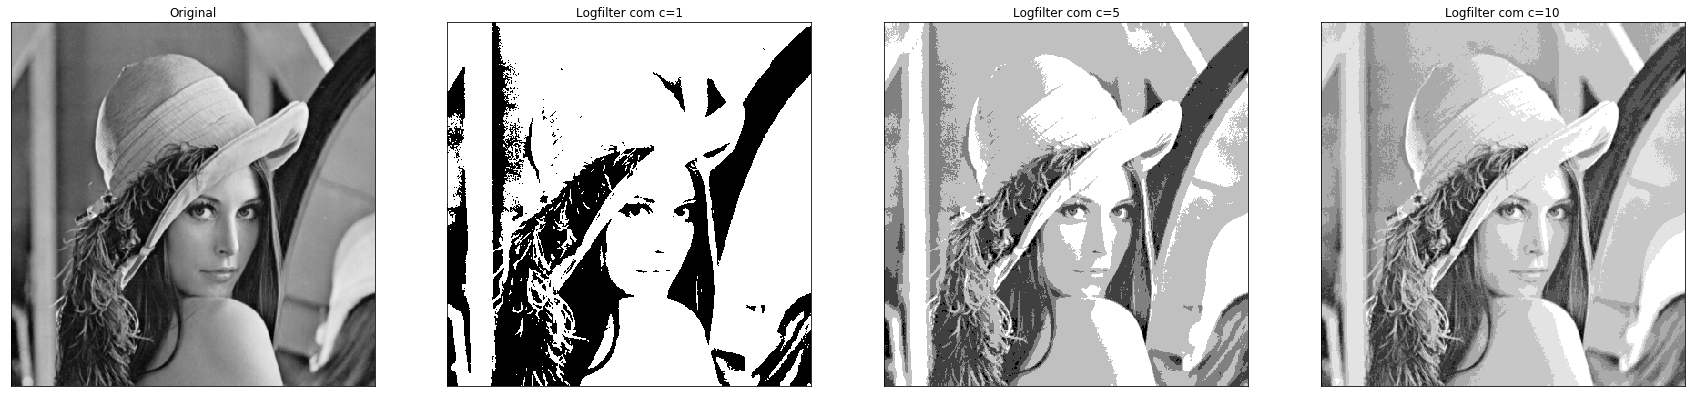

In [86]:
print('Select an image: \n')
header, rows, columns, max_intensity, matrix = my_readimage(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/'+input('Selected input(.pgm):')+'.pgm')

log_matrix1 = my_logfilter(header, rows, columns, max_intensity, matrix, 1)
my_writeimage(header, rows, columns, max_intensity, log_matrix1,'logfilter1.pgm')
log_matrix2 = my_logfilter(header, rows, columns, max_intensity, matrix, 5)
my_writeimage(header, rows, columns, max_intensity, log_matrix2,'logfilter2.pgm')
log_matrix3 = my_logfilter(header, rows, columns, max_intensity, matrix, 10)
my_writeimage(header, rows, columns, max_intensity, log_matrix3,'logfilter3.pgm')

img1 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/Lena.pgm',0)
#img1 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/einstein.pgm',0)
img2 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/logfilter1.pgm',0)
img3 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/logfilter2.pgm',0)
img4 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/logfilter3.pgm',0)

plt.figure(figsize=(30, 30))
plt.subplot(141),plt.imshow(img1, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(img2, cmap='gray'),plt.title('Logfilter com c=1')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img3, cmap='gray'),plt.title('Logfilter com c=5')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(img4, cmap='gray'),plt.title('Logfilter com c=10')
plt.xticks([]), plt.yticks([])
plt.show()

## Filtro Gama:

Select an image: 

Selected input(.pgm):Lena


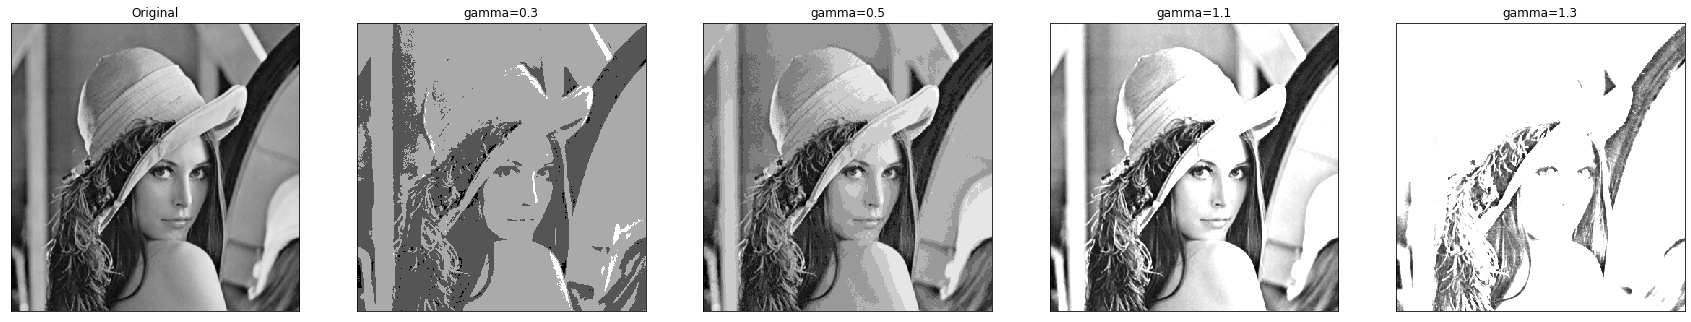

In [87]:
print('Select an image: \n')
header, rows, columns, max_intensity, matrix = my_readimage(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/'+input('Selected input(.pgm):')+'.pgm')

gamma_matrix1 = my_gammafilter(header, rows, columns, max_intensity, matrix, 1, 0.3)
my_writeimage(header, rows, columns, max_intensity, gamma_matrix1,'gammafilter1.pgm')
gamma_matrix2 = my_gammafilter(header, rows, columns, max_intensity, matrix, 1, 0.5)
my_writeimage(header, rows, columns, max_intensity, gamma_matrix2,'gammafilter2.pgm')
gamma_matrix3 = my_gammafilter(header, rows, columns, max_intensity, matrix, 1, 1.1)
my_writeimage(header, rows, columns, max_intensity, gamma_matrix3,'gammafilter3.pgm')
gamma_matrix4 = my_gammafilter(header, rows, columns, max_intensity, matrix, 1, 1.3)
my_writeimage(header, rows, columns, max_intensity, gamma_matrix4,'gammafilter4.pgm')

gimg1 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/Lena.pgm',0)
#gimg1 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/einstein.pgm',0)
gimg2 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/gammafilter1.pgm',0)
gimg3 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/gammafilter2.pgm',0)
gimg4 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/gammafilter3.pgm',0)
gimg5 = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/gammafilter4.pgm',0)

plt.figure(figsize=(30, 30))
plt.subplot(151),plt.imshow(gimg1, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(gimg2, cmap='gray'),plt.title('gamma=0.3')
plt.xticks([]), plt.yticks([])
plt.subplot(153),plt.imshow(gimg3, cmap='gray'),plt.title('gamma=0.5')
plt.xticks([]), plt.yticks([])
plt.subplot(154),plt.imshow(gimg4, cmap='gray'),plt.title('gamma=1.1')
plt.xticks([]), plt.yticks([])
plt.subplot(155),plt.imshow(gimg5, cmap='gray'),plt.title('gamma=1.3')
plt.xticks([]), plt.yticks([])
plt.show()

## Binarização de uma imagem:

Selected input(.pgm):placa


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

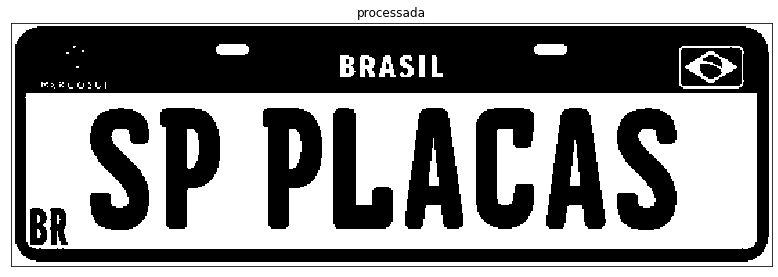

In [28]:
img = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/'+input('Selected input(.pgm):')+'.jpeg', 0)

new_image = img.copy()
new_image = np.where(img >= 128, new_image, 0)
new_image = np.where(img < 128, new_image, 255)

plt.figure(figsize=(30, 30))
plt.subplot(121),plt.imshow(new_image, cmap='gray'),plt.title('processada')
plt.xticks([]), plt.yticks([])